# Telco Customer Churn 데이터셋 소개

## 📌 데이터 개요

Telco Customer Churn 데이터는 미국 통신사 고객들의 서비스 이용 내역과 이탈 여부(Churn)를 포함하고 있는 데이터셋입니다.  
고객의 **계약 정보, 서비스 이용 현황, 요금 정보** 등을 기반으로 고객이 **이탈(Churn)할지를 예측**하는 데 사용됩니다.

- 데이터 출처:
- 총 샘플 수: 약 7,000건
- 이진 분류 문제: 고객이 이탈했는지 (`Churn`)


데이터 셋의 다운로드 경로

https://www.kaggle.com/datasets/blastchar/telco-customer-churn



| 컬럼명             | 설명 |
|--------------------|------|
| `customerID`       | 고유 고객 ID |
| `gender`           | 성별 (Male, Female) |
| `SeniorCitizen`    | 고령자 여부 (1: 고령자, 0: 비고령자) |
| `Partner`          | 배우자 유무 (Yes, No) |
| `Dependents`       | 부양 가족 유무 (Yes, No) |
| `tenure`           | 서비스 가입 기간 (개월 수) |
| `PhoneService`     | 전화 서비스 이용 여부 |
| `MultipleLines`    | 복수 회선 여부 |
| `InternetService`  | 인터넷 서비스 종류 (DSL, Fiber optic, No) |
| `OnlineSecurity`   | 온라인 보안 서비스 이용 여부 |
| `OnlineBackup`     | 온라인 백업 서비스 이용 여부 |
| `DeviceProtection` | 기기 보호 서비스 이용 여부 |
| `TechSupport`      | 기술 지원 서비스 이용 여부 |
| `StreamingTV`      | TV 스트리밍 서비스 이용 여부 |
| `StreamingMovies`  | 영화 스트리밍 서비스 이용 여부 |
| `Contract`         | 계약 형태 (Month-to-month, One year, Two year) |
| `PaperlessBilling` | 전자 청구서 수신 여부 |
| `PaymentMethod`    | 결제 방법 (전자이체, 신용카드 등) |
| `MonthlyCharges`   | 월 요금 |
| `TotalCharges`     | 총 청구 금액 |
| `Churn`            | **이탈 여부 (Yes, No)** ← 예측 대상




## 🎯 예측 목표

> 고객의 서비스 이용 기록을 바탕으로, **해당 고객이 이탈할 가능성이 있는지(`Churn`)를 예측**합니다.

- Yes → 이탈한 고객
- No  → 유지 중인 고객

#딥러닝 학습 프로세스

1. 필요한 라이브러리 가져오기
2. 데이터 로딩
3. 데이터 전처리
4. Sequential API를 이용한 모델 구조 정의
5. 모델 컴파일
6. 모델 학습
6. 모델 평가
7. 예측 수행
9. 시각화
10. 모델의 성능 개선

# 1. 라이브러리 가져오기

- 데이터 파일 (csv)를 불러오기 위해  pandas
- 데이터를 학습용과 테스트용으로 분리하기 위한 train_test_split 함수
- 수치 데이터의 표준화를 위해 StandardScaler
- 딥러닝 모델을 만들기 위한  Keras의 Sequential 과 Dense 클래스


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. 데이터 로딩

다운로드한 데이터 파일 `WA_Fn-UseC_-Telco-Customer-Churn.csv` 을 런타임 파일로 업로드합니다.


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
url = "./WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 데이터 탐색

1) 데이터 구조를 살펴보세요.
- 데이터가 몇 행 몇 열인지 확인합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
df.shape

(7043, 21)

2) 데이터 요약 정보를 확인해보세요.
- 각 열의 자료형, 결측치 유무, 메모리 사용량 등을 출력합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3) 범주형 변수와 수치형 변수 구분합니다.
- describe()는 기본적으로 수치형 변수에 대한 통계 요약을 보여줍니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 수치형 변수 요약 보기
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 범주형 변수 요약 보기
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


4) 범주형 컬럼들의 고유값을 확인합니다. (label 확인용)

[customerID], [TotalCharges]은 범주형 변수가 아님.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"[{col}] 고유값: {df[col].unique()}")


[customerID] 고유값: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
[gender] 고유값: ['Female' 'Male']
[Partner] 고유값: ['Yes' 'No']
[Dependents] 고유값: ['No' 'Yes']
[PhoneService] 고유값: ['No' 'Yes']
[MultipleLines] 고유값: ['No phone service' 'No' 'Yes']
[InternetService] 고유값: ['DSL' 'Fiber optic' 'No']
[OnlineSecurity] 고유값: ['No' 'Yes' 'No internet service']
[OnlineBackup] 고유값: ['Yes' 'No' 'No internet service']
[DeviceProtection] 고유값: ['No' 'Yes' 'No internet service']
[TechSupport] 고유값: ['No' 'Yes' 'No internet service']
[StreamingTV] 고유값: ['No' 'Yes' 'No internet service']
[StreamingMovies] 고유값: ['No' 'Yes' 'No internet service']
[Contract] 고유값: ['Month-to-month' 'One year' 'Two year']
[PaperlessBilling] 고유값: ['Yes' 'No']
[PaymentMethod] 고유값: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[TotalCharges] 고유값: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
[Churn] 고유값: ['No' 'Yes']


5) 이탈 여부(목표 변수) 분포를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 이탈 여부의 비율 확인
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


# 3. 데이터 전처리

1. 객체형 데이터의 수치형 변환 및 데이터 결측치 처리
2. 타겟 변수의 변환
3. 범주형 데이터를 모델 학습에 적합하도록 원핫인코딩
4. 입력(X), 정답(y) 분리
5. 입력값의 수치형 변수 정규화
6. 훈련/테스트 데이터 분리

## 1) 객체형 데이터의 수치형 변환 및 데이터 결측치 처리

- 공백 문자열이 있는 열을 먼저 처리
- 'TotalCharges' 열이 object로 불러와졌다면 수치로 변환

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# [1] TotalCharges 열의 문제 확인
print("[전처리 전] TotalCharges 열 타입:", df['TotalCharges'].dtype)
print("[전처리 전] TotalCharges 결측치 수:", df['TotalCharges'].isnull().sum())

[전처리 전] TotalCharges 열 타입: object
[전처리 전] TotalCharges 결측치 수: 0


공백 문자열이 있는 열을 수치로 변환하고 오류 발생 시 NaN으로 처리합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#공백 문자열이 있는 열을 수치로 변환 (오류 발생 시 NaN 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

변환 후 결측치 개수를 확인해보세요.

In [ ]:
# 변환 후 결측치 개수 확인
print("[전처리 후] TotalCharges 결측치 수:", df['TotalCharges'].isnull().sum())

[전처리 후] TotalCharges 결측치 수: 11


전체 결측치 개수를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 전체결측치 개수 확인
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


결측치 제거 전 후 데이터 크기 비교해서 확인합니다.


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
print("결측치 제거 전:", df.shape)
df = df.dropna()
print("결측치 제거 후:", df.shape)

결측치 제거 전: (7043, 21)
결측치 제거 후: (7032, 21)


## 2) 타겟 변수의 변환
Churn은 이탈 여부를 나타내는 이진 분류 타겟입니다.   
따라서 Yes는 1 (이탈), No는 0 (유지)로 변환해서 모델에 적용합니다.   
범주형 변수 → 숫자형으로 변환하는 Label Encoding 또는 One-hot Encoding을 수행할 수 있습니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#map() 를 이용해 이진 클래스(Yes/No)를 1 또는 0로 변환
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## 3) 범주형 변수의 원핫 인코딩

- [customerID]는 제거
- 이진 범주형 컬럼 처리 (Yes/No → 1/0) :  ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
- 나머지 범주형 변수 → One-hot Encoding



식별자인 customerID는 삭제합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#'customerID'는 식별자이므로 제거
df.drop('customerID', axis=1, inplace=True)

'Yes'/'No' 값을 갖는 이진 범주형 컬럼을 1과 0으로 변환하세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#이진 범주형 컬럼 처리 (Yes/No → 1/0)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    print(f"[전처리 전] {col} 고유값: {df[col].unique()}")
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"[전처리 후] {col} 고유값: {df[col].unique()}")

[전처리 전] Partner 고유값: ['Yes' 'No']
[전처리 후] Partner 고유값: [1 0]
[전처리 전] Dependents 고유값: ['No' 'Yes']
[전처리 후] Dependents 고유값: [0 1]
[전처리 전] PhoneService 고유값: ['No' 'Yes']
[전처리 후] PhoneService 고유값: [0 1]
[전처리 전] PaperlessBilling 고유값: ['Yes' 'No']
[전처리 후] PaperlessBilling 고유값: [1 0]


나머지 범주형 변수는 pd.get_dummies()로 처리해보세요.
- get_dummies는 문자열 범주형 변수를 0/1로 변환해 새로운 열 생성


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
print("원-핫 인코딩 적용 전 컬럼 수:", len(df.columns))
df = pd.get_dummies(df, drop_first=True)
print("원-핫 인코딩 적용 후 컬럼 수:", len(df.columns))

원-핫 인코딩 적용 전 컬럼 수: 20
원-핫 인코딩 적용 후 컬럼 수: 31


원-핫 인코딩 적용 후 데이터프레임의 구조를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   gender_Male                            7032 non-null   bool   
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

원-핫 인코딩이 잘 적용되었는지 데이터의 일부를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


## 4) 입력(X), 정답(y) 분리

- X : 타겟변수 제외
- y : 타겟변수

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## 5) 입력값의 수치형 변수 정규화

수치형 변수의 정규화 : 평균 0, 표준편차 1로 스케일링하여 신경망 학습 성능을 향상시켜보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

정규화 결과 형태를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 정규화 결과 형태 확인
X_scaled.shape, X_scaled[0]

((7032, 30),
 array([-0.44032709,  1.03561683, -0.65230493, -1.28024804, -3.05633383,
         0.82893915, -1.16169394, -0.99419409, -1.00943013,  3.05633383,
        -0.85433559, -0.88689648, -0.52513044, -0.52513044, -0.63374636,
        -0.52513044,  1.37833008, -0.52513044, -0.72391796, -0.52513044,
        -0.63926039, -0.52513044, -0.79018582, -0.52513044, -0.79684918,
        -0.51453688, -0.56136439, -0.5253508 ,  1.40476387, -0.54360352]))

## 6) 훈련/테스트 데이터 분리

먼저 전체 데이터를 학습/테스트셋으로 8:2 비율로 나눕니다.
  - `test_size=0.2`: 전체 데이터 중 20%를 테스트셋으로 사용
  - `random_state=42`: 데이터 분할의 일관성을 위해 고정된 난수 시드 사용

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# 4. 모델 구조 정의

### 통신사 고객 이탈 여부 예측 모델 구조는 다음과 같습니다.

| 층 (Layer)                | 뉴런 수 | 활성화 함수 | 설명 |
|---------------------------|---------|--------------|------|
| 입력층 + Dense            | 128     | ReLU         | 입력 특성 정의, 첫 번째 은닉층 정의 |
| Dense                    | 64      | ReLU         | 두 번째 은닉층 정의, 추가적인  특성 학습 |
| 출력층 (Dense)            | 1       | Sigmoid      | 확률(0~1)을 출력하는 이진 분류용 출력층 |

- 입력층 + 첫 번째 은닉층 정의하기 : 입력 데이터를 받아 노드 128개로 비선형 변환합니다.  활성화 함수 ReLU는 계산이 빠르고 성능이 좋습니다.   
- 두 번째 은닉층 정의하기 : 앞 레이어에서 추출한 특징을 압축/추상화합니다.   
- 출력층 (이진 분류 → sigmoid) : 최종 이탈 예측 결과(0~1 확률)로 이진분류용 확률 함수 시그모이드를 지정합니다.


고객이 이탈할 확률을 예측하고,
그 확률이 일정 기준(보통 0.5) 이상이면 "이탈",
아니면 "잔류"라고 분류합니다.

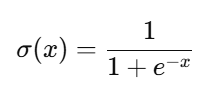


시그모이드는 입력값 x가 아무리 작거나 커도 출력값은 0과 1 사이로 나옵니다.

- 출력값이 0~1 → “이탈할 확률”로 직관적 해석
- 0.5 기준으로 0 or 1 결정 가능
- 	binary_crossentropy와 함께 쓰면 확률 기반 손실 계산 가능

다중 분류 (3개 이상 클래스)라면,   
`Dense(class 수, activation='softmax'` 로 설정합니다.

Sequential 모델을 사용하여 이진 분류를 위한 신경망 구조를 정의해보세요.

은닉층은 2개로 구성하고, 출력층에는 sigmoid 함수를 사용합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
model = Sequential([
    # 입력층 → 첫 번째 은닉층
    # 노드 128개, 활성화 함수: ReLU
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    # 두 번째 은닉층: 노드 64개
    Dense(64, activation='relu'),

    # 출력층: 이진 분류를 위한 sigmoid 함수 사용 (출력값: 0~1 확률)
    Dense(1, activation='sigmoid')  # 이진 분류
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 5. 모델 컴파일

모델 학습을 위한 설정을 수행합니다.

- 학습 방법(가중치를 어떻게 조정할지) : `optimizer='adam'`
- 이진 분류용 손실 함수 지정 : `loss='binary_crossentropy'`
- binary_crossentropy : 예측 확률과 실제 라벨(0 또는 1)의 차이를 로그 함수 기반으로 계산
- 평가지표 지정 : `metrics=['accuracy']`
- accuracy : 전체 샘플 중에서 정확히 예측한 비율을 평가하는 지표.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. 모델 학습

실제 데이터를 이용해 가중치 조정하며, 모델 학습시킵니다.
모델 학습 시 조기 종료(EarlyStopping)를 적용하여 과적합을 방지하고, 가장 성능이 좋은 모델만 저장하기 위한 콜백(callback) 함수 설정합니다.

1) EarlyStopping, ModelCheckpoint 클래스를 가져오세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2) ModelCheckpoint 콜백을 설정해보세요.
- `'model.keras'` : 모델 가중치를 저장할 파일 이름
- `monitor='val_loss'` : 검증 손실을 기준으로 가장 작을 때를 저장해서 성능 추적   
- `save_best_only=True` :	검증 손실이 개선된 경우에만 저장
- `verbose=1` :	저장 시마다 안내 메시지 출력 (기록 확인 가능)

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
checkpoint = ModelCheckpoint(
    'model.keras', monitor='val_loss',
    save_best_only=True, verbose=1
)

3) EarlyStopping 콜백을 설정해보세요.

- `monitor='val_loss'`:
- `patience=10` : 10 에포크 연속으로 개선이 없으면 학습 중단   
- `restore_best_weights=True` : 가장 성능이 좋았던 가중치로 복원

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

4) 콜백을 적용시켜보세요.

모델을 학습시키는 파라미터로 위에서 정의한 두 콜백을 지정합니다.

### 🛠️ 모델 학습 파라미터 정리

| 매개변수              | 설정값        | 설명 |
|-----------------------|---------------|------|
| `X_train`, `y_train`  | -             | 입력 데이터와 정답 데이터 (훈련용) |
| `epochs`              | `100`         | 전체 데이터를 학습할 최대 반복 횟수 |
| `batch_size`          | `32`          | 한 번에 학습에 사용하는 데이터 수 (미니배치 크기) |
| `validation_split`    | `0.2`         | 훈련 데이터의 20%를 검증용으로 자동 분리 |
| `callbacks`           | `[early_stop]`| 조기 종료 기능 적용 (`val_loss`가 개선되지 않으면 중단) |
| `callbacks`           | `[checkpoint]`| 가장 좋은 모델 저장(`val_loss`가 가장 작을 때 저장) |
| `verbose`             | `1`           | 학습 로그 출력 방식 (1: 진행률 표시) |


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
131/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.5159
Epoch 1: val_loss improved from inf to 0.40832, saving model to model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7286 - loss: 0.5119 - val_accuracy: 0.8036 - val_loss: 0.4083
Epoch 2/100
137/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8067 - loss: 0.4162
Epoch 2: val_loss improved from 0.40832 to 0.40655, saving model to model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4162 - val_accuracy: 0.8107 - val_loss: 0.4065
Epoch 3/100
134/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.4000
Epoch 3: val_loss did not improve from 0.40655
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 0.4005 - val_accuracy: 0.8009 - val_loss: 0.4123
Epoch 4/100
125/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4022
Epoch 4: val_loss did not improve from 0.40655
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

<모델 학습 로그의 해석 예시>

- Epoch 1~2 :	val_loss가 계속 감소 → 모델이 점점 잘 학습됨
- Epoch 3 이후 :val_loss가 더 이상 개선되지 않음 → 과적합 조짐 시작
- Epoch 12까지 진행	: patience=10 설정 덕분에 총 10번 참음 (Epoch 2 이후 10번 실패) → 다음 Epoch 13에서 학습 자동 중단 예정


<모델 체크포인트 지점 요약 예시>
- Epoch1 : `val_loss improved from inf to 0.41535` → 가장 첫 val_loss이 저장됨
- Epoch2 : `val_loss improved from 0.41535 to 0.41013` → 가장 낮은 검증 손실 → 모델 저장됨 (model.h5)
- Epoch 3~12 : `val_loss did not improve from 0.41013` → 모델이 더 이상 일반화 성능을 향상시키지 못함 → 과적합 시작




# 7. 모델 평가

model.evaluate(): 학습된 모델에 대해 테스트셋 성능을 평가합니다.

- X_test: 입력 데이터
- y_test: 실제 정답 라벨

평가지표 : 정확도 acc

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2%}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4259
Test Accuracy: 80.38%


# 8. 예측 수행

저장된 최적 이진 분류 모델 불러옵니다.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')

테스트 입력 데이터에 대해 예측 수행합니다.
- `model.predict(X_test)` : 테스트셋에 대한 예측 (확률 값 반환)
- 확률값을 기준으로 이진 분류 : 0.5보다 크면 클래스 1 (이탈), 작으면 0 (비이탈)

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


혼동 행렬을 생성해보세요.

- Confusion_matrix: 예측 결과를 분류별로 정리한 혼동 행렬을 생성
- classification_report: 분류 성능 리포트 - 정밀도(Precision), 재현율(Recall), F1-score 등을 출력

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#혼동 행렬
print(confusion_matrix(y_test, y_pred))

[[954  79]
 [219 155]]


<혼동행렬 해석 예시>


- **TN (True Negative)**: 잔류 고객을 정확히 잔류로 예측 → `954건`
- **FP (False Positive)**: 잔류 고객을 이탈로 잘못 예측 → `79건`
- **FN (False Negative)**: 이탈 고객을 잔류로 잘못 예측 → `219건`
- **TP (True Positive)**: 이탈 고객을 정확히 이탈로 예측 → `155건`

분류 성능 리포트를 생성해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#분류 성능 리포트
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.66      0.41      0.51       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



- 전체 정확도(Accuracy)는 약 **79%**  
- **정밀도(Precision)**: 이탈(1)이라고 예측한 것 중 실제 이탈 비율은 **66%**  
- **재현율(Recall)**: 실제 이탈자(1) 중 모델이 맞춘 비율은 **41%**  
- **F1-score**는 이탈자 예측에서 약 **51%** 수준입니다.

# 9. 시각화

딥러닝 모델 학습 후, model.fit() 함수가 반환한 History 객체 안에 어떤 학습 지표들이 저장되어 있는지를 확인해 봅니다.

- `history.history`는 딕셔너리 형태로, 각 key에 대해 epoch별 값이 리스트로 저장됩니다.  
예: `history.history['loss']` → `[0.45, 0.39, 0.36, ...]`
- 손실 곡선, 정확도 곡선 등으로 시각화, 성능 추적에 필요합니다.

| Key 이름        | 의미                     | 설명 |
|------------------|--------------------------|------|
| `loss`           | 훈련 손실 값              | 각 epoch마다 훈련셋에서 계산된 손실 (예: binary_crossentropy) |
| `accuracy`       | 훈련 정확도               | 훈련셋에서 모델이 얼마나 정확하게 분류했는지를 측정 |
| `val_loss`       | 검증 손실 값              | 검증셋(validation set)에서의 손실. 과적합 여부 판단에 사용 |
| `val_accuracy`   | 검증 정확도               | 검증셋에서의 분류 정확도. 모델의 일반화 성능을 판단하는 데 사용 |


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#history.history에 어떤 키가 있는지 확인하기
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


1) 손실 곡선(Loss Curve) 시각화

손실 곡선은 딥러닝 모델이 학습 도중 얼마나 오차를 줄였는지를 보여주는 그래프입니다.

- history.history['loss']	: 에포크(epoch)별 훈련 손실값 (Binary Crossentropy 기준)
- history.history['val_loss']	: 에포크별 검증 손실값

잘 학습된 곡선의 경우, 초기에는 손실이 높고, 점점 감소하는 양상을 보입니다.
- Train Loss와 Val Loss가 비슷한 수준에서 함께 낮아집니다.
→ 일반화(Generalization)가 잘 된 모델

과적합 신호   
- Train Loss는 계속 감소하는데 Val Loss가 증가하거나 평평해지면 과적합 시작
- 이런 경우 EarlyStopping 또는 Dropout 등의 기술 적용 필요합니다.

In [ ]:
# 여기에 코드를 작성해보세요!

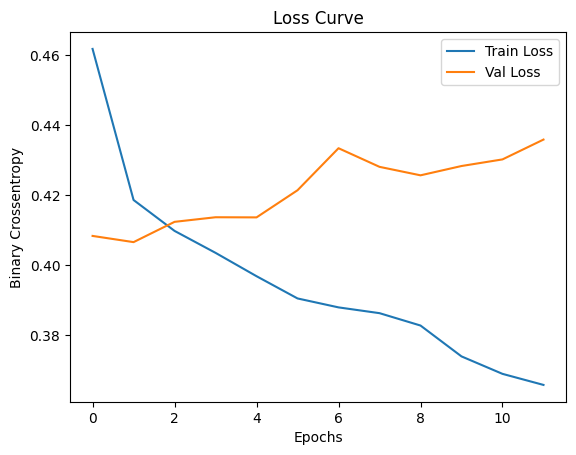

In [ ]:
#손실 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend()

- 훈련 손실(Train Loss)은 계속 감소하는 반면, 검증 손실(Val Loss)은 중간부터 다시 증가하고 있는 양상을 보입니다.   
- 이것은 딥러닝 학습에서 매우 전형적인 오버피팅의 신호입니다.

2) 정확도 곡선 시각화

딥러닝 모델이 훈련 도중 **얼마나 정확하게 예측했는지**를 시각적으로 보여줍니다.  
- 학습셋(`accuracy`)과 검증셋(`val_accuracy`)의 정확도 변화를 비교합니다.
- **일반화 성능과 과적합 여부를 확인**할 수 있습니다.



- history.history['accuracy'] : 에포크별 훈련 정확도 기록
- history.history['val_accuracy'] :	에포크별 검증 정확도 기록

잘 학습된 모델의 특징
- 초기엔 정확도가 낮다가 점점 상승
- Train Accuracy와 Val Accuracy가 나란히 증가
→ 모델이 학습 데이터를 잘 따라가면서도, 검증 데이터에 대한 일반화 성능도 좋음

과적합 신호
- Train Accuracy는 증가하지만 Val Accuracy가 일정 수준 이후 정체 또는 하락
- EarlyStopping, Dropout, 정규화 등의 기술로 일반화 성능을 높이는 것이 필요

In [ ]:
# 여기에 코드를 작성해보세요!

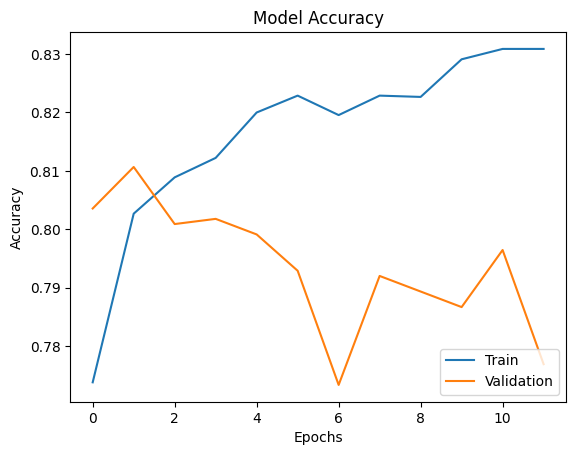

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


- 초기에는 훈련과 검증 모두 상승
- 약 2 epoch 이후부터 훈련 정확도는 계속 상승하지만, 검증 정확도는 거의 일정하거나 오히려 감소하는 모습을 보입니다.
- 새로운 데이터에 대한 일반화 성능은 떨어지고 있음을 의미합니다

# 10. 모델의 성능 개선

재현율의 개선 방법 : threshold 조정, class_weight, 모델 구조 개선 등이 있습니다.   
오버피팅 해소 방법 : 일반화 성능 개선을 위해 EarlyStopping, Dropout, 정규화 등을 적용합니다.

참고1) 예측 임계값(Threshold) 조정

모델은 기본적으로 **0.5**를 기준으로 예측 확률을 0 또는 1로 나눕니다.
이 기준을 낮추면(예: 0.4),
- **더 많은 데이터를 이탈(1)로 예측**하게 되어  
**재현율(Recall)이 증가**할 수 있습니다.
- 임계값을 너무 낮추면 False Positive가 증가 → 정밀도(precision) 하락할 수 있습니다.



참고2) class_weight 사용 (이탈 클래스 가중치 부여)   
학습 데이터에서 이탈(1)이 적은 불균형 데이터인 경우,  **모델은 잔류(0)를 더 많이 예측하려는 경향**이 있습니다.

- 이탈 클래스에 **더 높은 가중치**를 주면,  모델이 **이탈자를 더 중요하게 학습**하게 됩니다.
- `model.fit(class_weight={0: 1.0, 1: 2.5}`),  # 클래스 1(이탈)의 가중치 ↑
- 가중치를 너무 높이면 FP 증가 → 비이탈을 이탈로 잘못 예측할 수 있습니다.

참고3) 모델 구조 개선 (복잡도와 일반화 향상)

현재 모델이 이탈자를 잘 잡지 못하는 이유 중 하나는  **학습 표현력 부족**, 또는 **과적합으로 인한 일반화 실패**일 수 있습니다.

- **Dropout**: 과적합 방지
- **BatchNormalization**: 학습 안정화
- **Layer 추가**: 더 깊은 표현력 확보
- 구조가 너무 복잡하면 오히려 학습이 어려워질 수 있으므로 성능 확인 후 점진적으로 조정

참고4)

모델의 오버피팅을 해소하기 위해 이번 예제에서는 모델의 구조 개선을 실습합니다.

개선 모델에는 Dropout, 정규화, 배치정규화, 최적화된 모델의 자동 저장 기능을 통합하여 적용합니다.
- L2 정규화	가중치가 너무 커지지 않도록 제한 → 모델 단순화
- BatchNormalization	입력 분포 안정화 → 과적합 방지 + 빠른 학습
- Dropout	무작위 노드 비활성화 → 학습 다양화

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#성능개선을 위한 클래스 가져오기
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

**다음과 같이 모델을 구성해보세요.**

### 모델 구조 개선

| 층 (Layer)                | 뉴런 수 | 활성화 함수 | 설명 |
|---------------------------|---------|--------------|------|
| 입력층 + Dense            | 128     | ReLU         | 입력 특성 정의, 첫 번째 은닉층 정의, L2정규화를 통해 복잡도 감소  |
| BatchNormalization        | -       | -            | 은닉층 출력값을 정규화하여 학습 안정화 및 속도 향상 |
| Dropout                  | -       | -            | 50%의 뉴런을 무작위로 제거하여 과적합 방지 |
| Dense                    | 64      | ReLU         | 두 번째 은닉층 정의, 추가적인  특성 학습, L2정규화를 통해 복잡도 감소 |
| Dropout                  | -       | -            | 30%의 뉴런 드롭아웃 적용 |
| 출력층 (Dense)            | 1       | Sigmoid      | 확률(0~1)을 출력하는 이진 분류용 출력층 |

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 1. 모델 구성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 2. 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**다음과 같이 진행해보세요.**

콜백 설정 (EarlyStopping + 최적 모델 저장)

EarlyStopping: 검증 손실(val_loss)이 5번 연속 좋아지지 않으면 학습 자동 중단

 - restore_best_weights=True → 가장 성능 좋았던 시점의 가중치로 복원

ModelCheckpoint: 학습 중 검증 손실이 가장 낮았을 때의 모델만 저장

 - 'best_model.keras'로 저장됨

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 3. 콜백 설정 (EarlyStopping + 최적 모델 저장)
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
)

## 모델 학습
**다음과 같이 모델 학습을 시작해보세요.**

- validation_split=0.2: 학습 데이터의 20%를 검증용으로 사용
- epochs=100: 최대 반복 횟수 (EarlyStopping으로 조기 종료될 수 있음)
- batch_size=32: 한 번에 학습할 데이터 샘플 수
- callbacks: EarlyStopping, ModelCheckpoint 기능 적용
- verbose=1: 학습 진행 상황 출력

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 4. 모델 학습 시작
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/100
129/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.8969
Epoch 1: val_loss improved from inf to 0.55239, saving model to best_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6186 - loss: 0.8834 - val_accuracy: 0.7938 - val_loss: 0.5524
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7667 - loss: 0.6232
Epoch 2: val_loss improved from 0.55239 to 0.53811, saving model to best_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7666 - loss: 0.6232 - val_accuracy: 0.7929 - val_loss: 0.5381
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7665 - loss: 0.5962
Epoch 3: val_loss improved from 0.53811 to 0.53061, saving model to best_model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7666 - loss: 0.5961 - val_accuracy: 0.7893 - val_loss: 0.5306
Epoch 4/100
139/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7627 - loss: 0.5913
Epoch 4: val_loss improved from 0.53061 to 0.51275

 총 **26 Epoch** 동안 학습
- `ModelCheckpoint` 콜백을 사용하여 **최상의 val_loss에서 모델 자동 저장**
- 최적 모델은 **Epoch 26**에서 저장됨 (val_loss = **0.44496**)

- **훈련 손실과 검증 손실이 꾸준히 감소 → 과적합 없음**
- Train/Val 정확도 모두 **80% 안팎으로 수렴** → 일반화 잘 된 상태
- 성능이 일찍부터 정체되지 않고 **꾸준히 향상** → 모델이 충분히 학습됨

## 평가

모델을 평가해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
# 5. 평가
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2%}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.4571
Test Accuracy: 79.74%


## 시각화

1) 손실 곡선을 시각화 해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

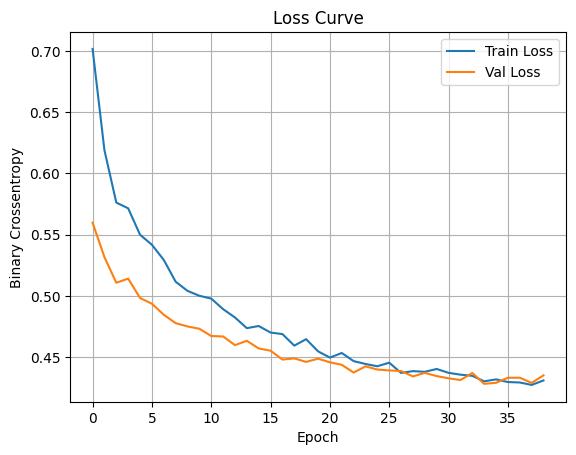

In [ ]:
#손실 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid()
plt.show()

- 학습과 검증 손실이 모두 점진적으로 감소하며 비슷한 수준을 유지하고 있습니다.    
- 이는 모델이 학습 데이터에 과하게 적합되지 않고, 일반화 성능도 함께 향상되었음을 보여줍니다.    
- Dropout, BatchNormalization, L2 정규화 등의 적용이 효과적이었음을 알 수 있습니다.

- history.history['accuracy'] : 에포크별 훈련 정확도 기록
- history.history['val_accuracy'] :	에포크별 검증 정확도 기록

In [ ]:
# 여기에 코드를 작성해보세요!

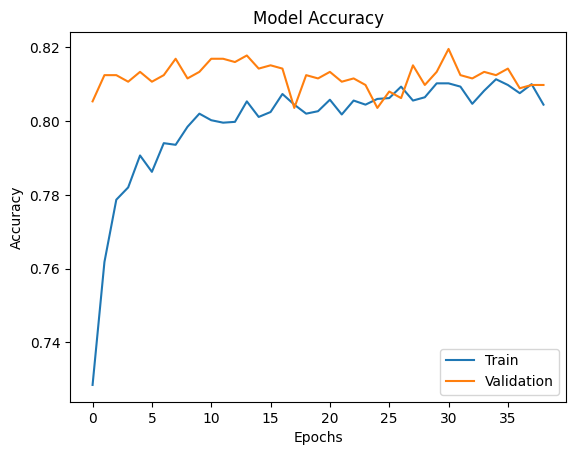

In [ ]:
#정확도 곡선 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


* 훈련 정확도와 검증 정확도가 유사한 수준에서 수렴하므로, 모델이 과적합되지 않고 적절히 일반화된 것으로 보입니다.
* 약 20~25 에포크 이후부터 두 정확도가 안정화되었으므로, 더 많은 에포크를 학습시키는 것은 큰 이점을 제공하지 않을 가능성이 있습니다.

## 예측 수행
예측 결과를 확인해보세요.

In [ ]:
# 여기에 코드를 작성해보세요!

In [ ]:
#7. 예측
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#혼동 행렬
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[918 115]
 [192 182]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



<혼동행렬 해석 예시>

- **TN (True Negative)**: 잔류 고객을 정확히 잔류로 예측 → `918건`
- **FP (False Positive)**: 잔류 고객을 이탈로 잘못 예측 → `115건`
- **FN (False Negative)**: 이탈 고객을 잔류로 잘못 예측 → `192건`
- **TP (True Positive)**: 이탈 고객을 정확히 이탈로 예측 → `182건`